### Pycaret
PyCaret is a low-code ML library in Pythin that automates many parts pf the ML pipeline. It is used for classification. regression, Clustering wtc., and make model training and evaluation easier with minimal code

In [1]:
from pycaret.classification import *
#this import all classification related functions from PyCaret, it imports setup() and compare_models() etc.,
import pandas as pd

In [2]:
diabetes= pd.read_csv('diabetes_ml_ready_data.csv')

In [3]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85.0,66.000000,29.00000,155.548223,26.6,0.351,31,0
1,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21,0
2,5,116.0,74.000000,29.15342,155.548223,25.6,0.201,30,0
3,10,115.0,72.405184,29.15342,155.548223,35.3,0.134,29,0
4,4,110.0,92.000000,29.15342,155.548223,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
752,1,128.0,88.000000,39.00000,110.000000,36.5,1.057,37,1
753,0,123.0,72.000000,29.15342,155.548223,36.3,0.258,52,1
754,6,190.0,92.000000,29.15342,155.548223,35.5,0.278,66,1
755,9,170.0,74.000000,31.00000,155.548223,44.0,0.403,43,1


In [4]:
#Setup() is the first step in any PyCaret flow, it prepares the dataset and initialize the ML environment
#think of setup() as a datapreprocessing and environment configuration in one line
env_setup = setup(data=diabetes,target='Outcome',session_id=123,fold=5)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(757, 9)"
4,Transformed data shape,"(757, 9)"
5,Transformed train set shape,"(529, 9)"
6,Transformed test set shape,"(228, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [5]:
best_model = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7543,0.8153,0.5512,0.6966,0.6108,0.4359,0.4454,0.0320
lda,Linear Discriminant Analysis,0.7524,0.8157,0.5512,0.6918,0.6091,0.4324,0.4414,0.0300
lr,Logistic Regression,0.7505,0.8155,0.5512,0.6886,0.6074,0.4290,0.4380,2.0640
rf,Random Forest Classifier,0.7504,0.8092,0.5511,0.6817,0.6066,0.4279,0.4348,0.2020
ada,Ada Boost Classifier,0.7430,0.7776,0.5615,0.6648,0.6060,0.4178,0.4230,0.1280
qda,Quadratic Discriminant Analysis,0.7429,0.7911,0.5457,0.6679,0.5992,0.4132,0.4187,0.0360
et,Extra Trees Classifier,0.7429,0.8022,0.5299,0.6759,0.5904,0.4083,0.4168,0.2120
gbc,Gradient Boosting Classifier,0.7353,0.8022,0.5565,0.6469,0.5957,0.4015,0.4056,0.1740
nb,Naive Bayes,0.7221,0.7882,0.5511,0.6273,0.5830,0.3766,0.3811,1.1220
lightgbm,Light Gradient Boosting Machine,0.7203,0.7914,0.5508,0.6232,0.5807,0.3731,0.3774,0.4380


In [6]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [7]:
model_rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7264,0.7199,0.4865,0.6429,0.5538,0.3620,0.3693
1,0.7925,0.8653,0.7027,0.7027,0.7027,0.5433,0.5433
2,0.7642,0.8557,0.5789,0.7097,0.6377,0.4655,0.4708
3,0.7453,0.8247,0.4737,0.7200,0.5714,0.4010,0.4188
4,0.7238,0.7804,0.5135,0.6333,0.5672,0.3676,0.3720
Mean,0.7504,0.8092,0.5511,0.6817,0.6066,0.4279,0.4348
Std,0.0256,0.0535,0.0841,0.0362,0.0562,0.0685,0.0657


In [8]:
print(model_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [9]:
tune_rf = tune_model(model_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7736,0.7558,0.4324,0.8421,0.5714,0.4384,0.4834
1,0.7830,0.8314,0.4865,0.8182,0.6102,0.4730,0.5037
2,0.7642,0.7889,0.5263,0.7407,0.6154,0.4523,0.4660
3,0.7547,0.7608,0.3947,0.8333,0.5357,0.3967,0.4478
4,0.7429,0.7822,0.3243,0.8571,0.4706,0.3436,0.4144
Mean,0.7637,0.7838,0.4329,0.8183,0.5607,0.4208,0.4631
Std,0.0140,0.0268,0.0705,0.0408,0.0535,0.0460,0.0305


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [10]:
print(tune_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_samples_leaf=5,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=150, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


#### Visualize the error distribution of a trained/tuned model

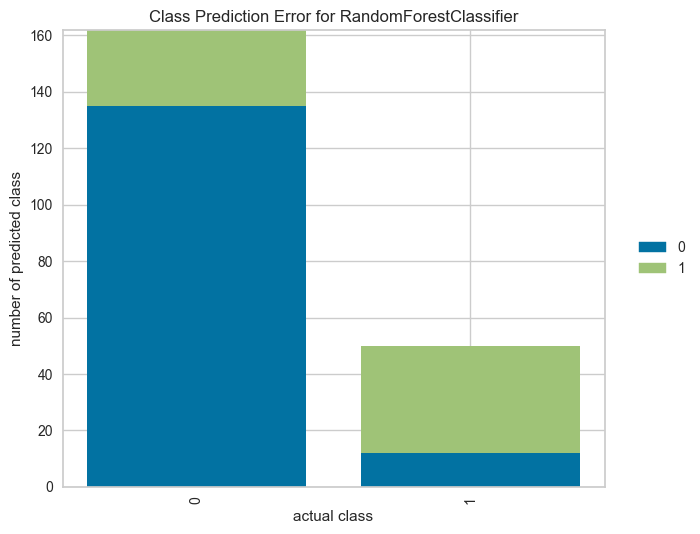

In [11]:
plot_model(tune_rf, plot='error')

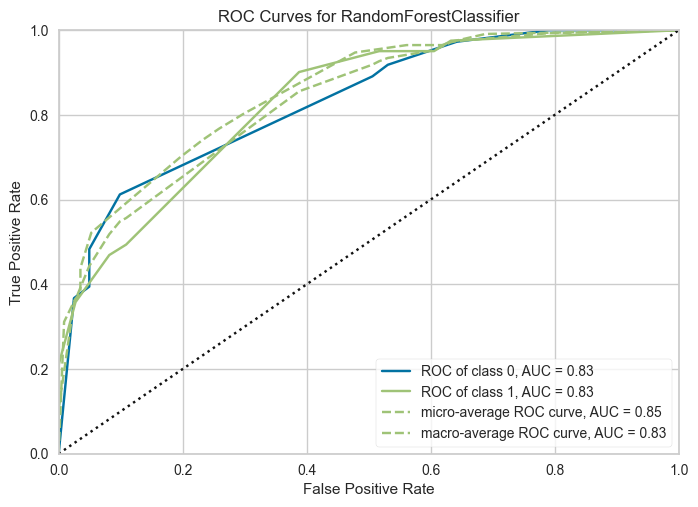

In [12]:
plot_model(tune_rf,plot="auc")

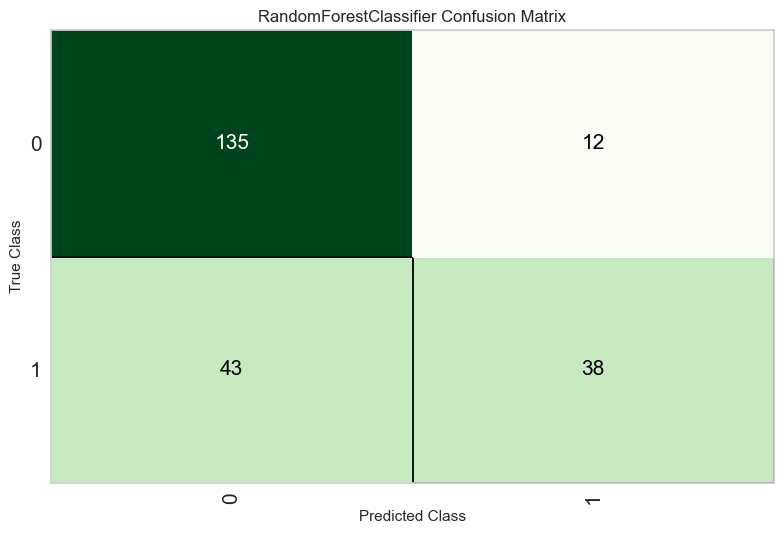

In [13]:
plot_model(tune_rf,plot='confusion_matrix')